### Import Library

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
# Loading the merged dataset
data = pd.read_csv('ECGSignal_Data.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135,0
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185,0
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125,0
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125,0
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165,0


In [3]:
X = data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.175,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.095,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.135,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.165,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.155,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165


In [4]:
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 125, dtype: int64

In [5]:
print(f"The Shape of the X: {X.shape}")
print(f"The Shape of the y: {y.shape}")

The Shape of the X: (189459, 125)
The Shape of the y: (189459,)


### Dividing Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Without Sampling

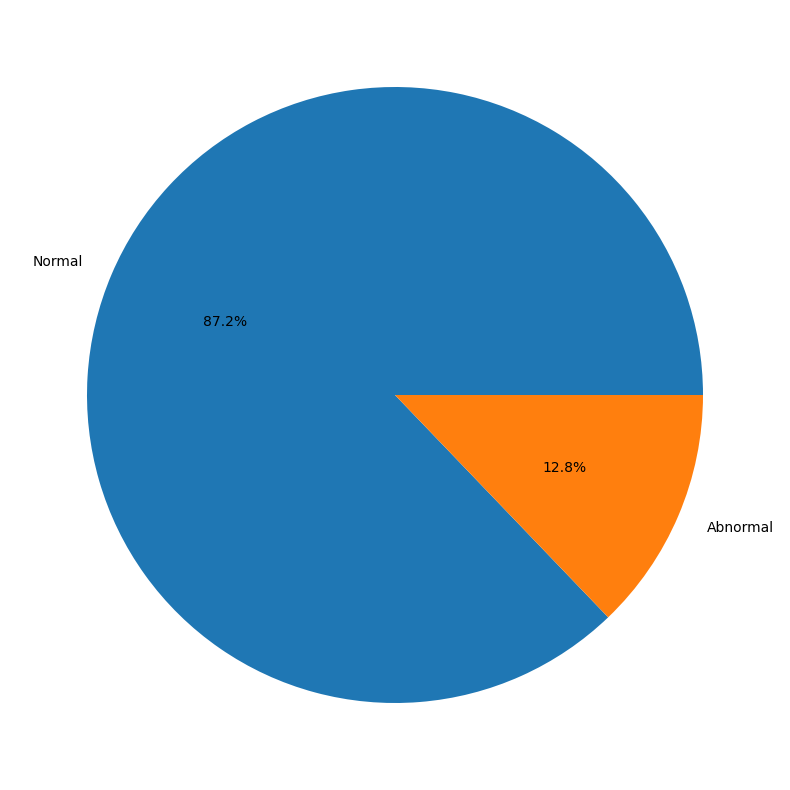

In [7]:
per_classes = data.iloc[:, -1].value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

In [8]:
# importing library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [9]:
# model define

knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
import seaborn as sns

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

def plot_metrics(models, X_train, y_train, X_test, y_test):
    # Loop through each model
    for name, model in models.items():
        print(f"Training and plotting for {name}")
        model.fit(X_train, y_train)
        
        # Predict values
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(20, 6))
        plt.subplot(1, 3, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        
        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.subplot(1, 3, 2)
        plt.plot(recall, precision, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {name}')
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.subplot(1, 3, 3)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix - {name}')
        
        plt.tight_layout()
        plt.show()

# Call the function
# plot_metrics(lrc, X_train, y_train, X_test, y_test)


In [11]:
clfs = {
    'DT': dtc,  
    'LR': lrc,
    'KN' : knc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

Training and plotting for DT


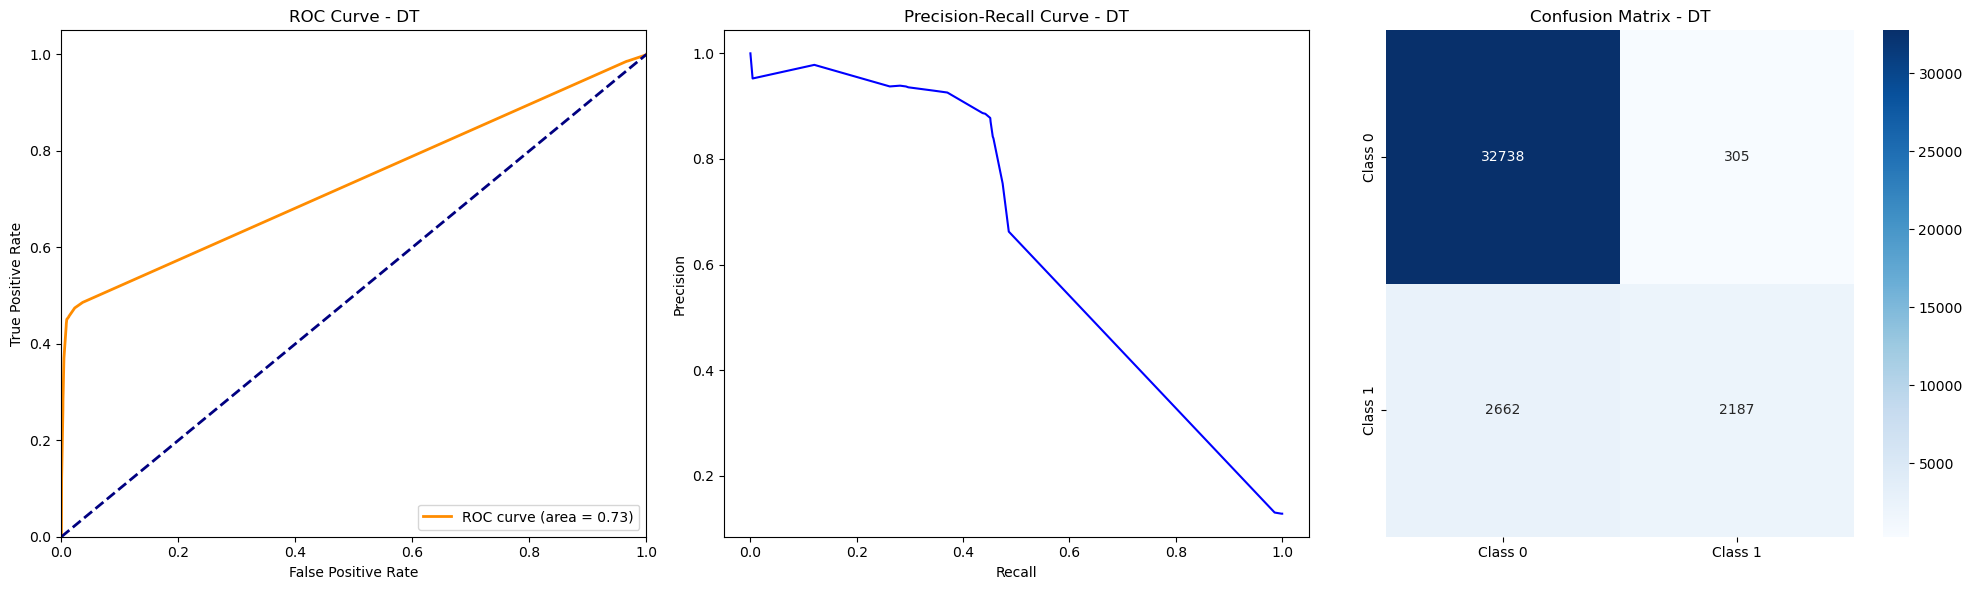

Training and plotting for LR


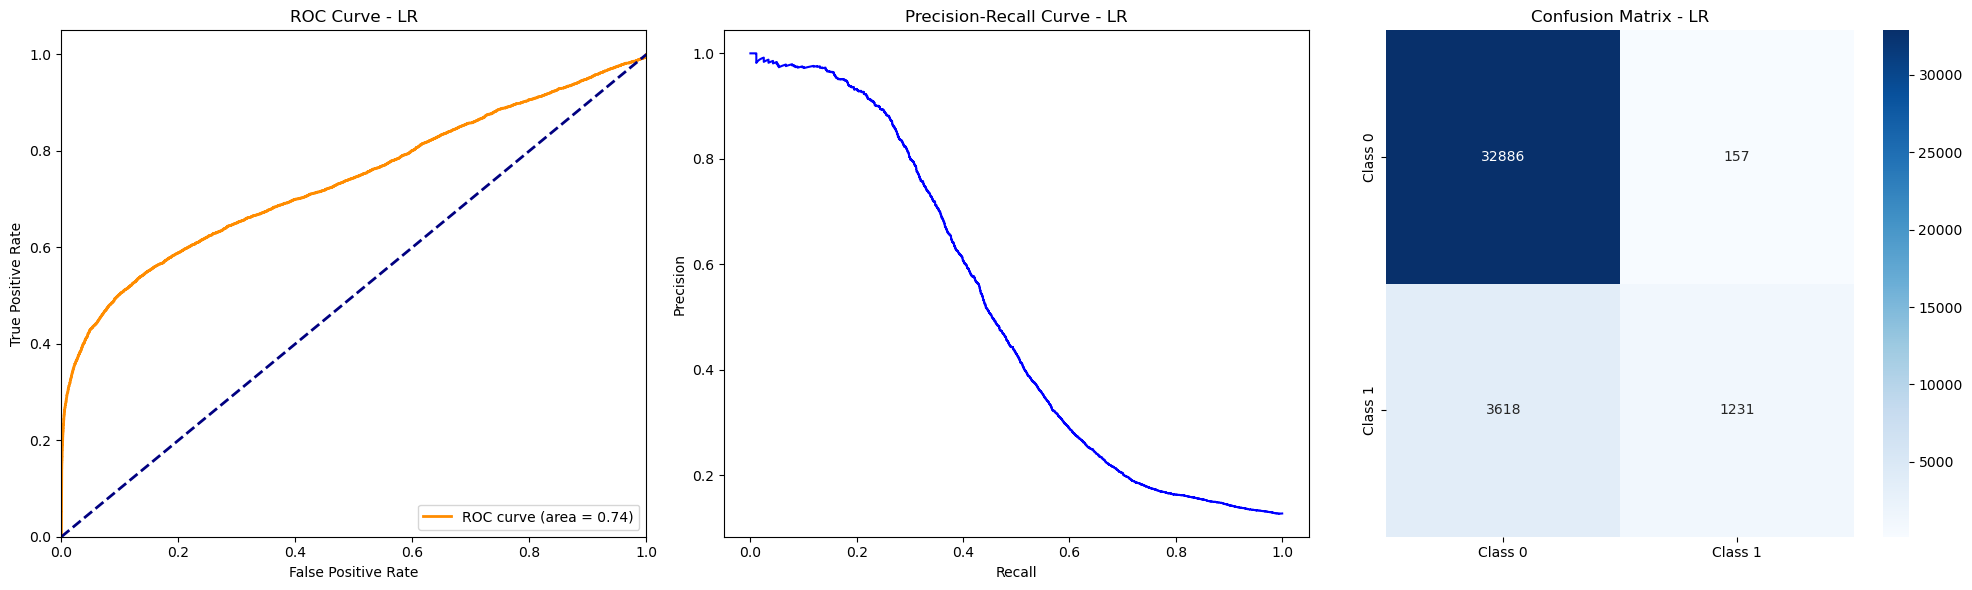

Training and plotting for KN


  File "e:\Seg\Test\segment-anything-2\condaenv\newenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\Seg\Test\segment-anything-2\condaenv\newenv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\Seg\Test\segment-anything-2\condaenv\newenv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Seg\Test\segment-anything-2\condaenv\newenv\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


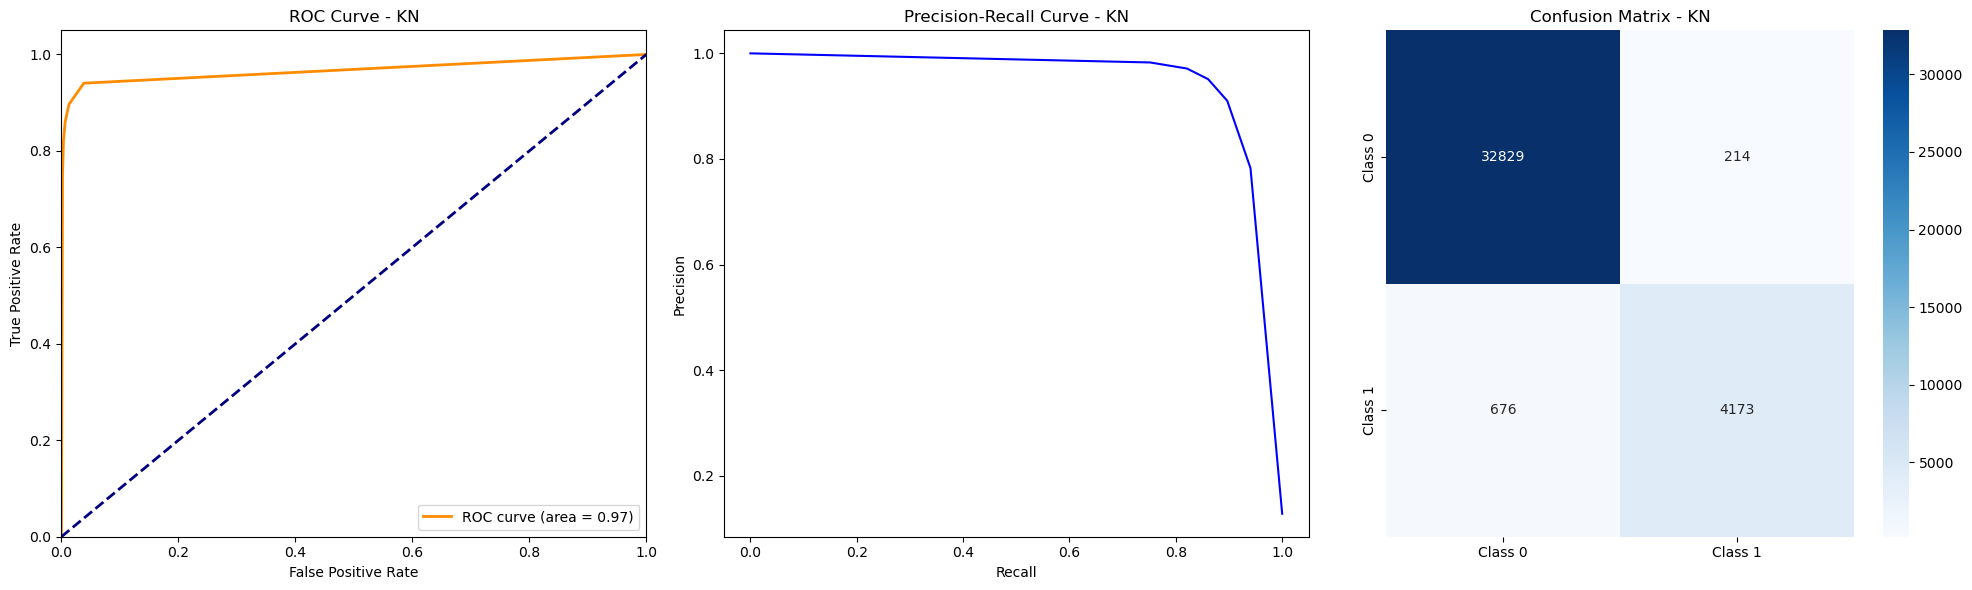

Training and plotting for RF


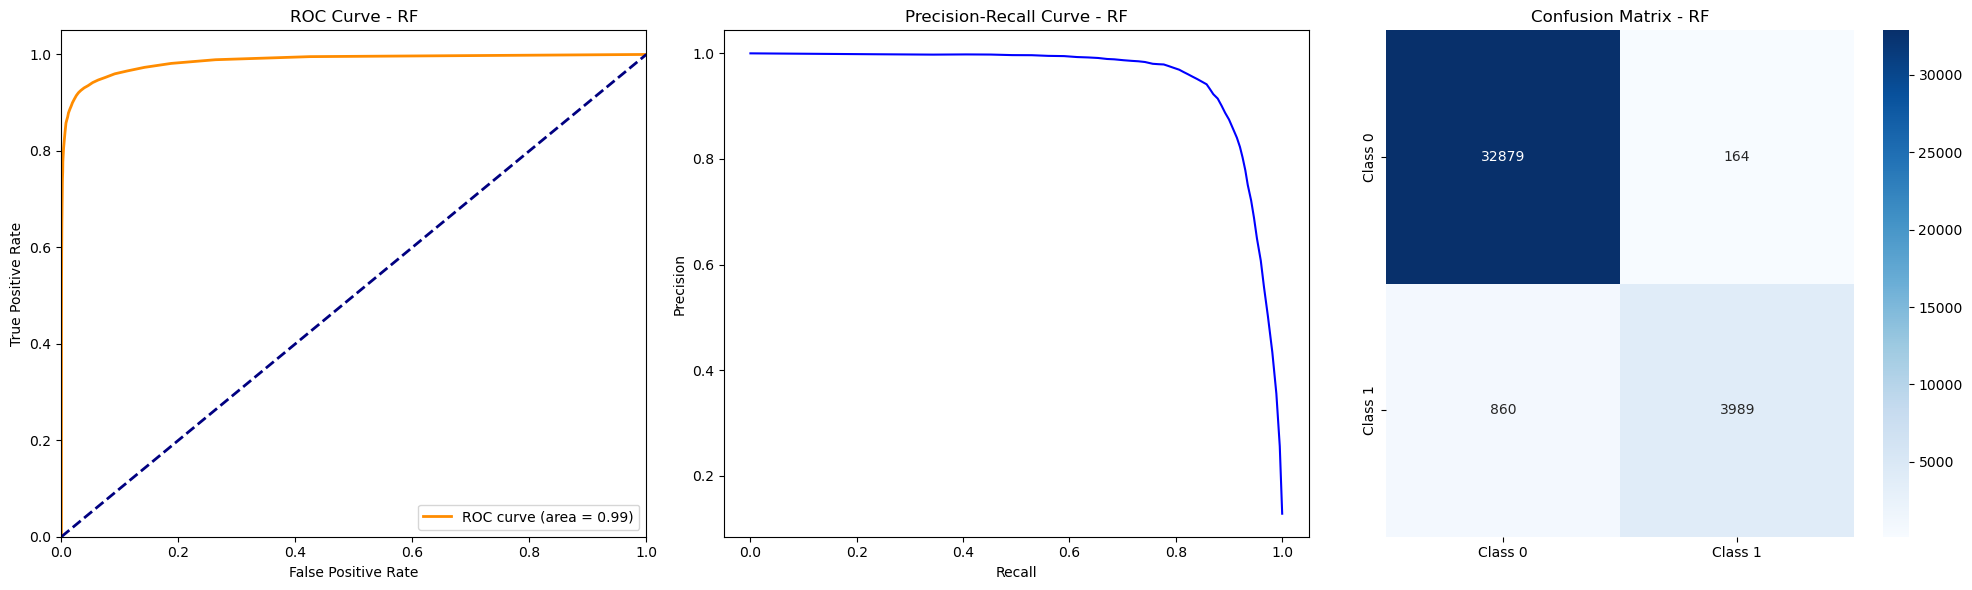

Training and plotting for AdaBoost


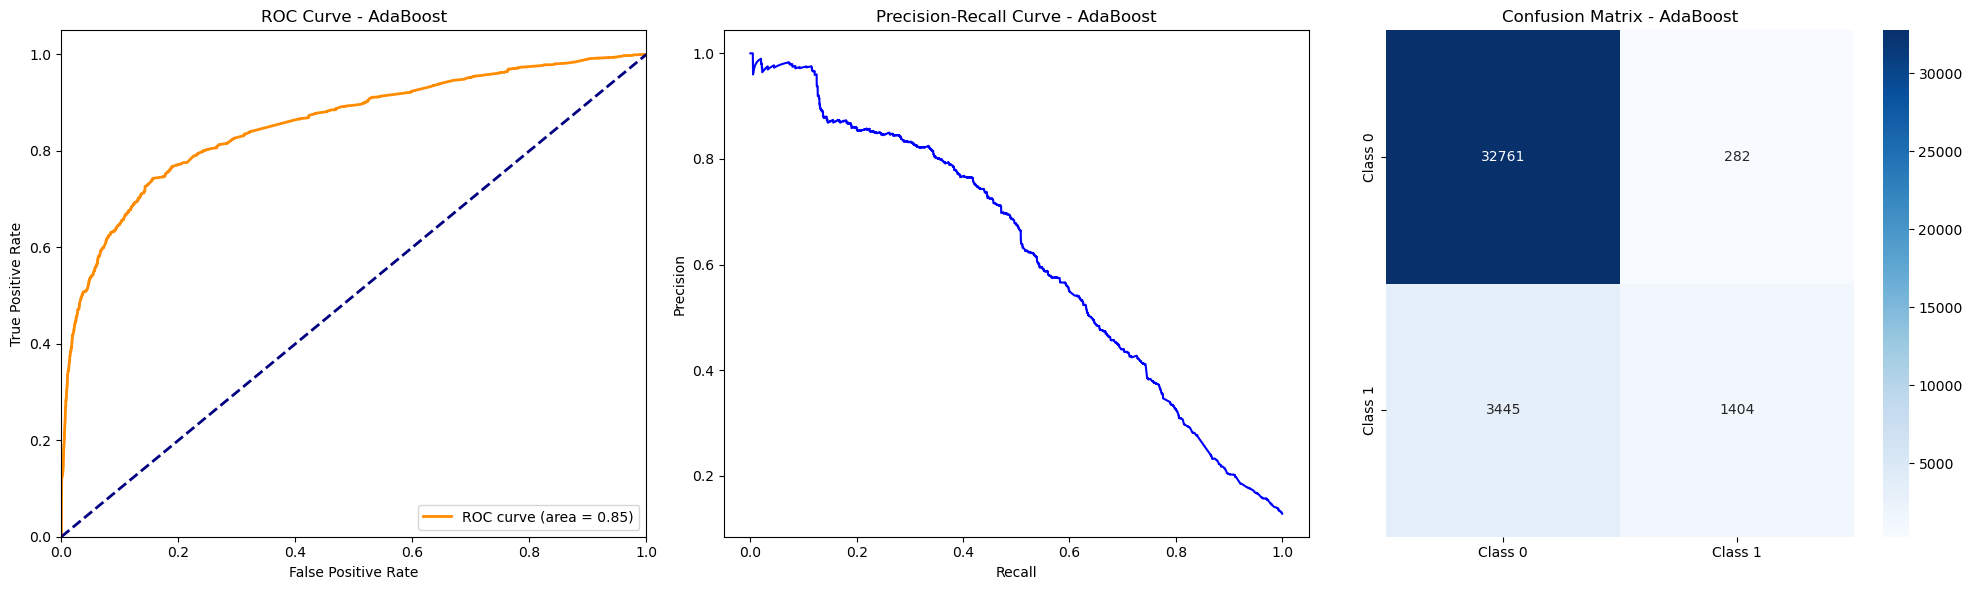

Training and plotting for ETC


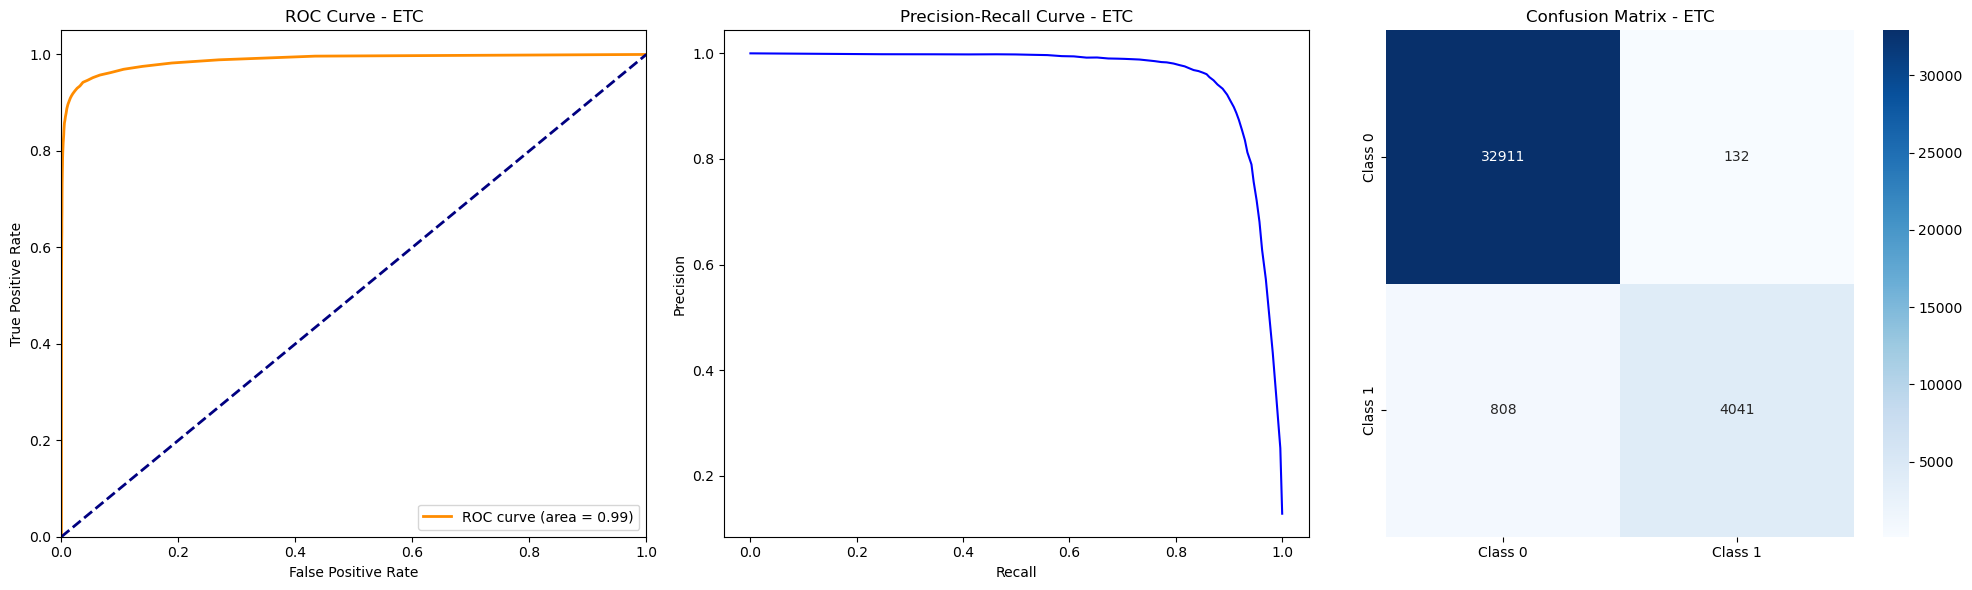

Training and plotting for GBDT


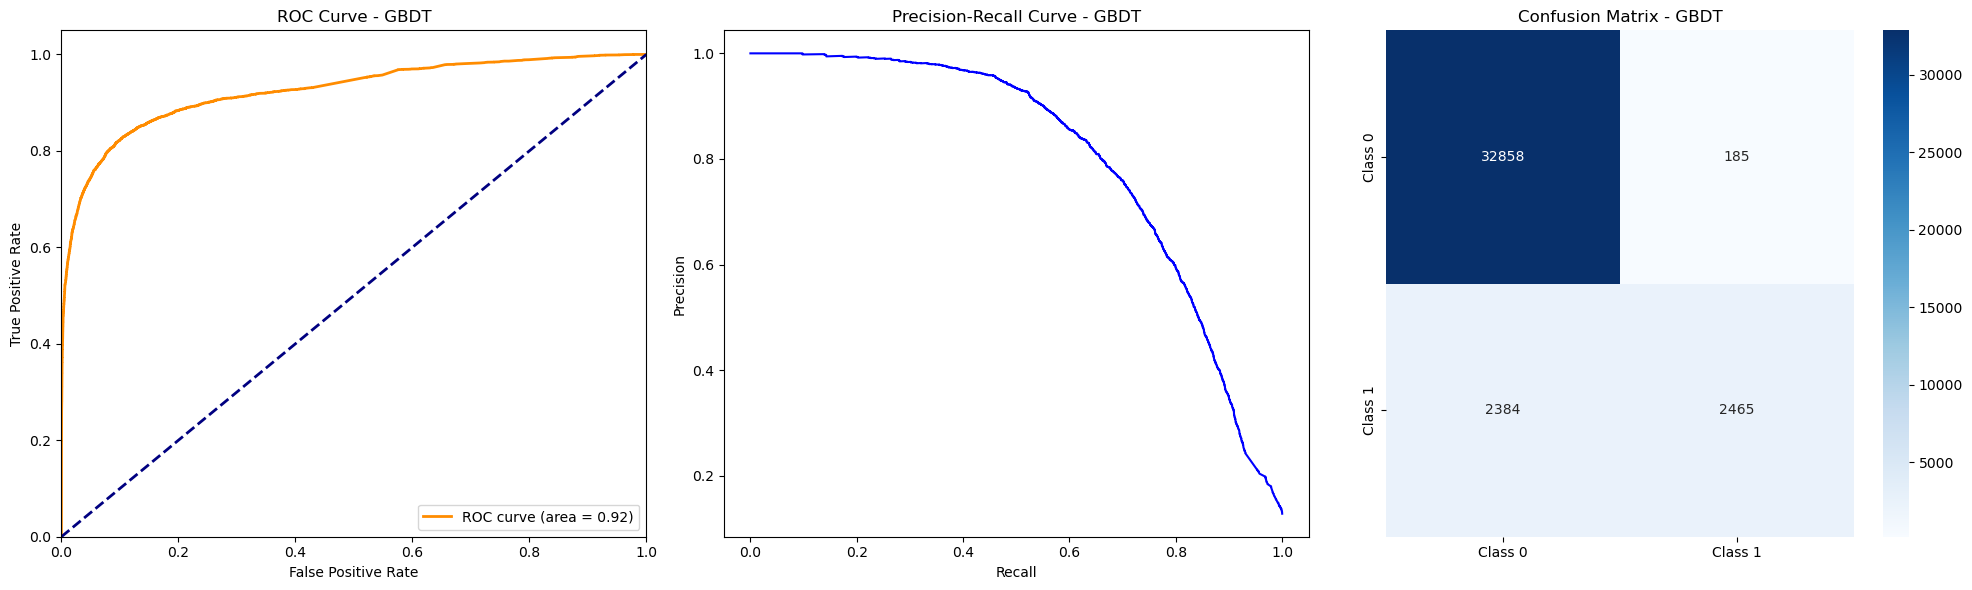

Training and plotting for xgb


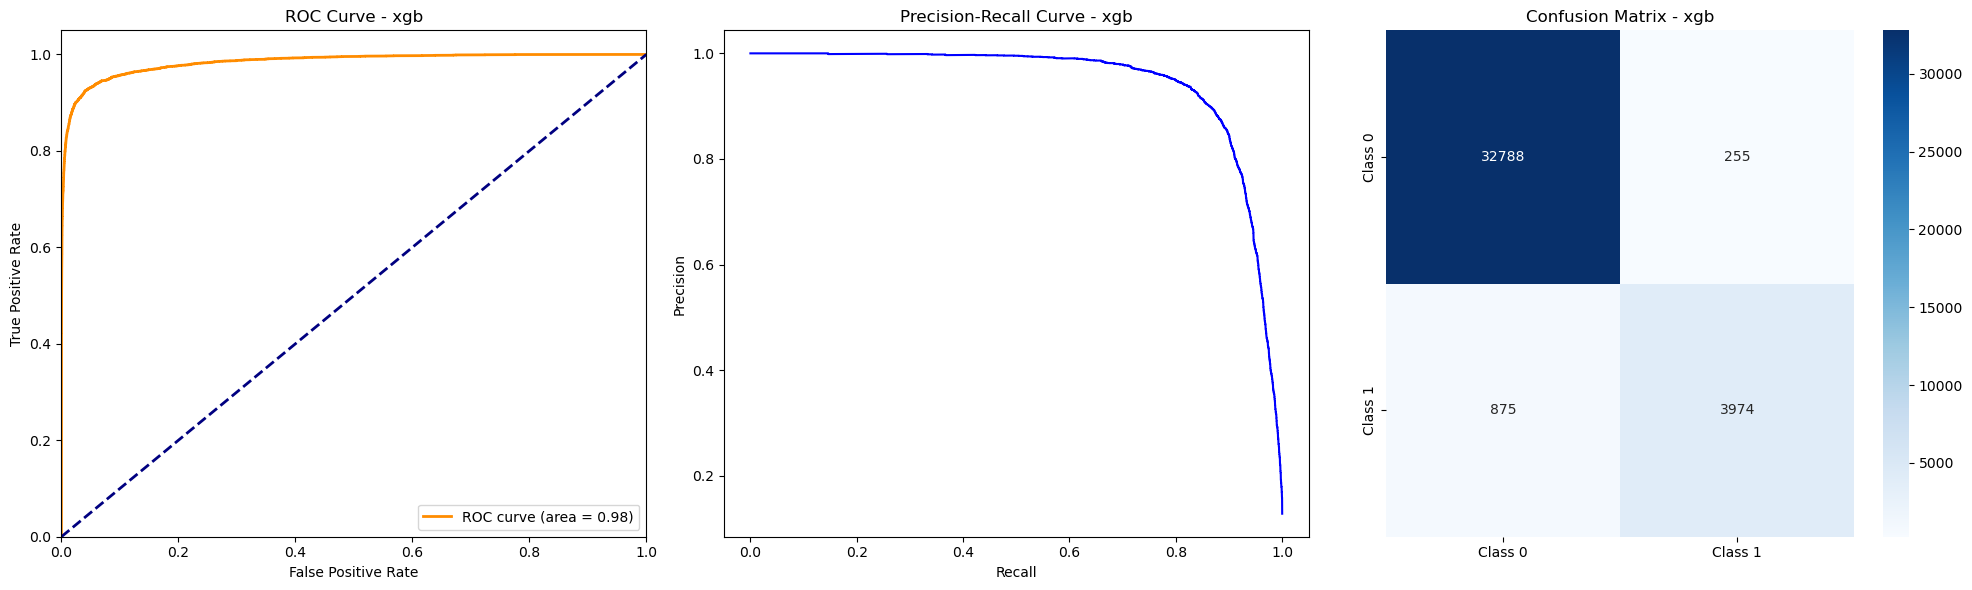

In [12]:
plot_metrics(clfs, X_train, y_train, X_test, y_test)

In [13]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     return accuracy, precision, recall, f1, y_pred

In [14]:
# sanity check
# a, b, c, d, e = train_classifier(lrc,X_train,y_train,X_test,y_test)

In [15]:


# for name,clf in clfs.items():
    
#     current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

#     print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    


In [16]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

In [17]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.975193,0.968368,0.833368,0.895810
3,RF,0.972976,0.960510,0.822644,0.886248
2,KN,0.976512,0.951220,0.860590,0.903638
7,xgb,0.970178,0.939702,0.819550,0.875523
6,GBDT,0.932202,0.930189,0.508352,0.657421
1,LR,0.900375,0.886888,0.253867,0.394741
0,DT,0.921699,0.877608,0.451021,0.595832
4,AdaBoost,0.901642,0.832740,0.289544,0.429686


## After Sampling

In [18]:
# Increasing the data
sm = SMOTE(k_neighbors=6)
updated_X, updated_y = sm.fit_resample(X, y)

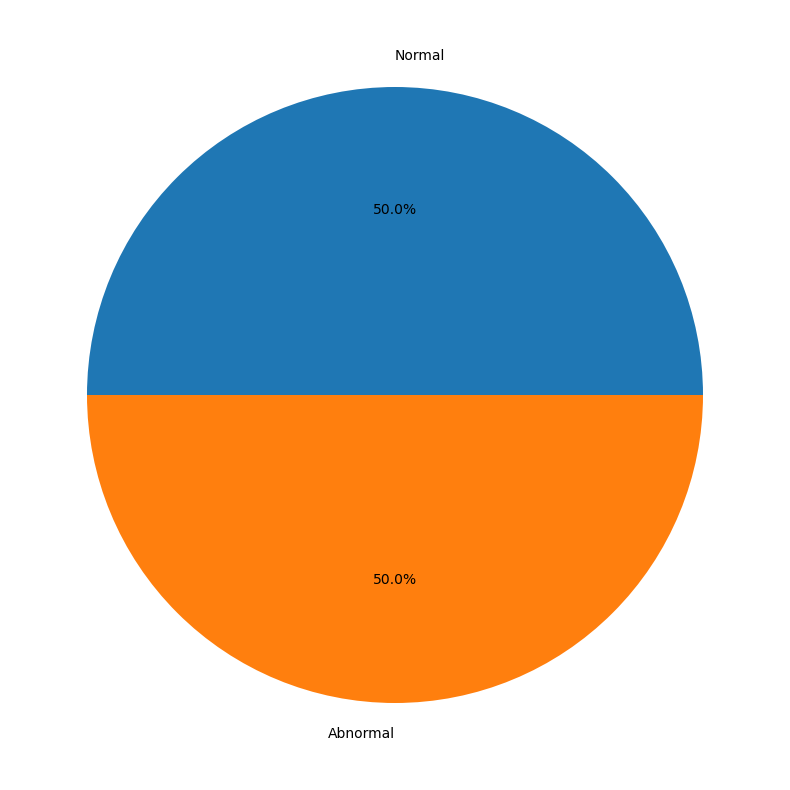

In [19]:
# Checking the class size
per_classes = updated_y.value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

In [20]:
train_x, test_x, train_y, test_y = train_test_split(updated_X, updated_y, test_size = 0.2, random_state=42)

Training and plotting for DT


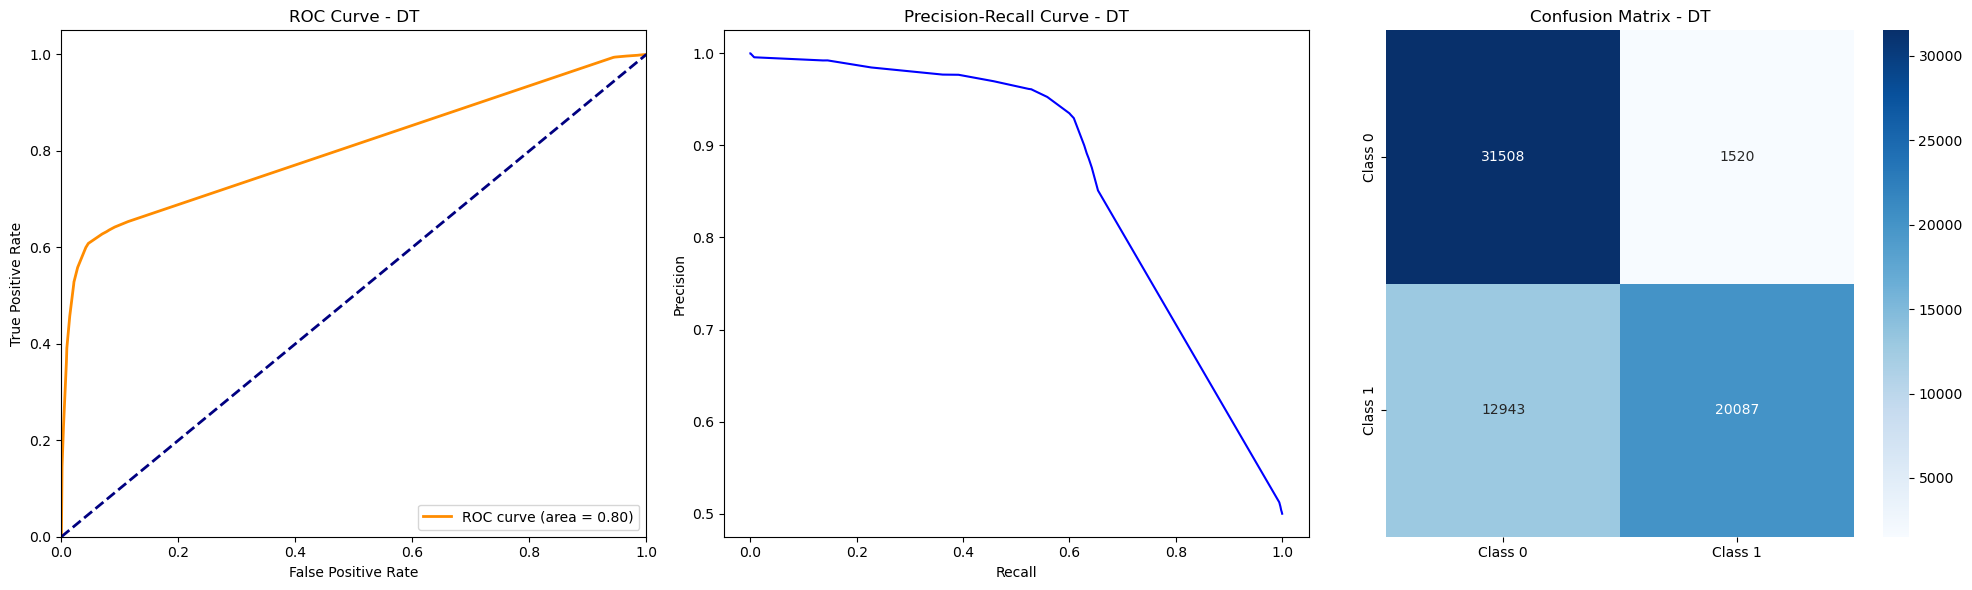

Training and plotting for LR


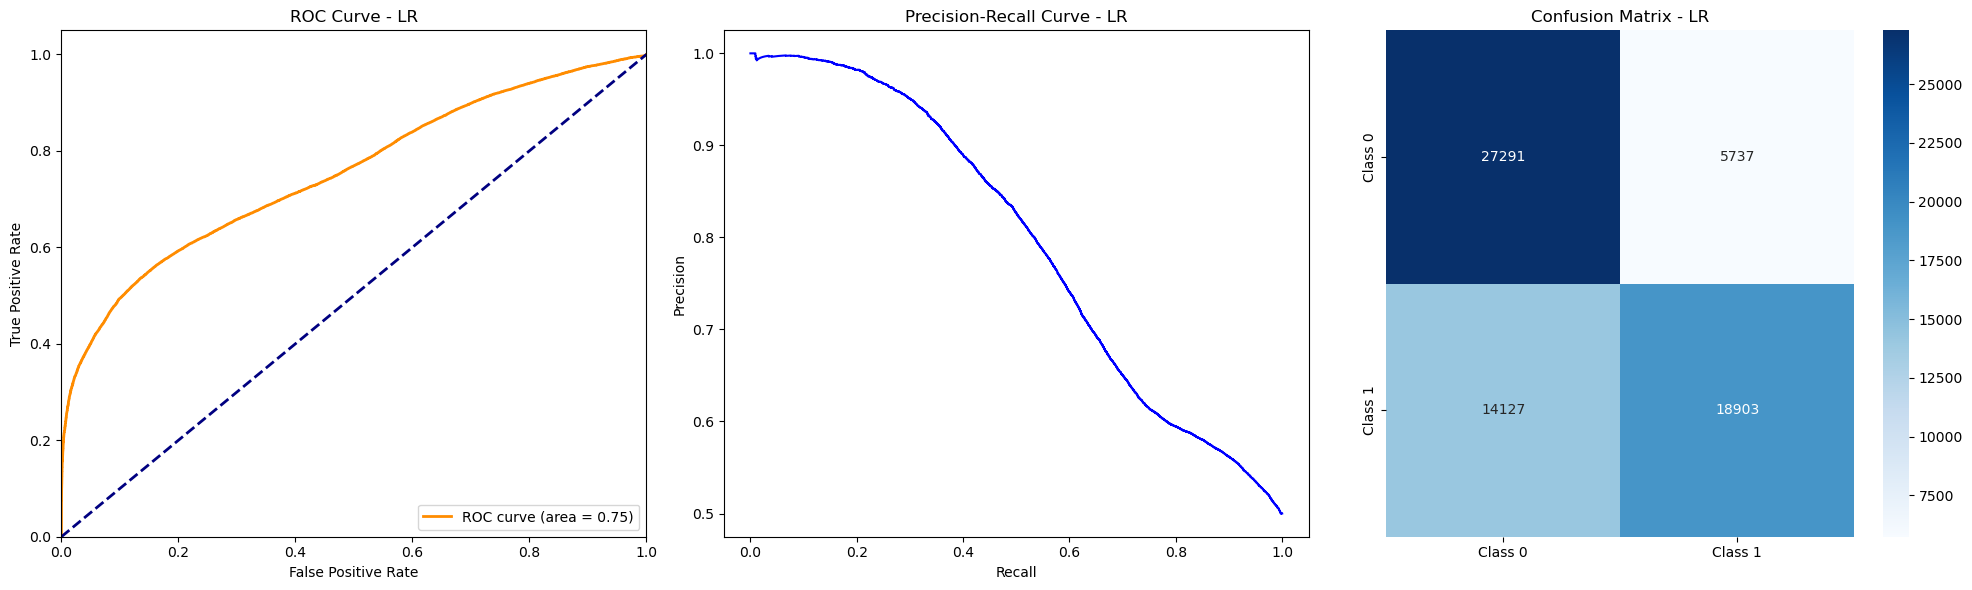

Training and plotting for KN


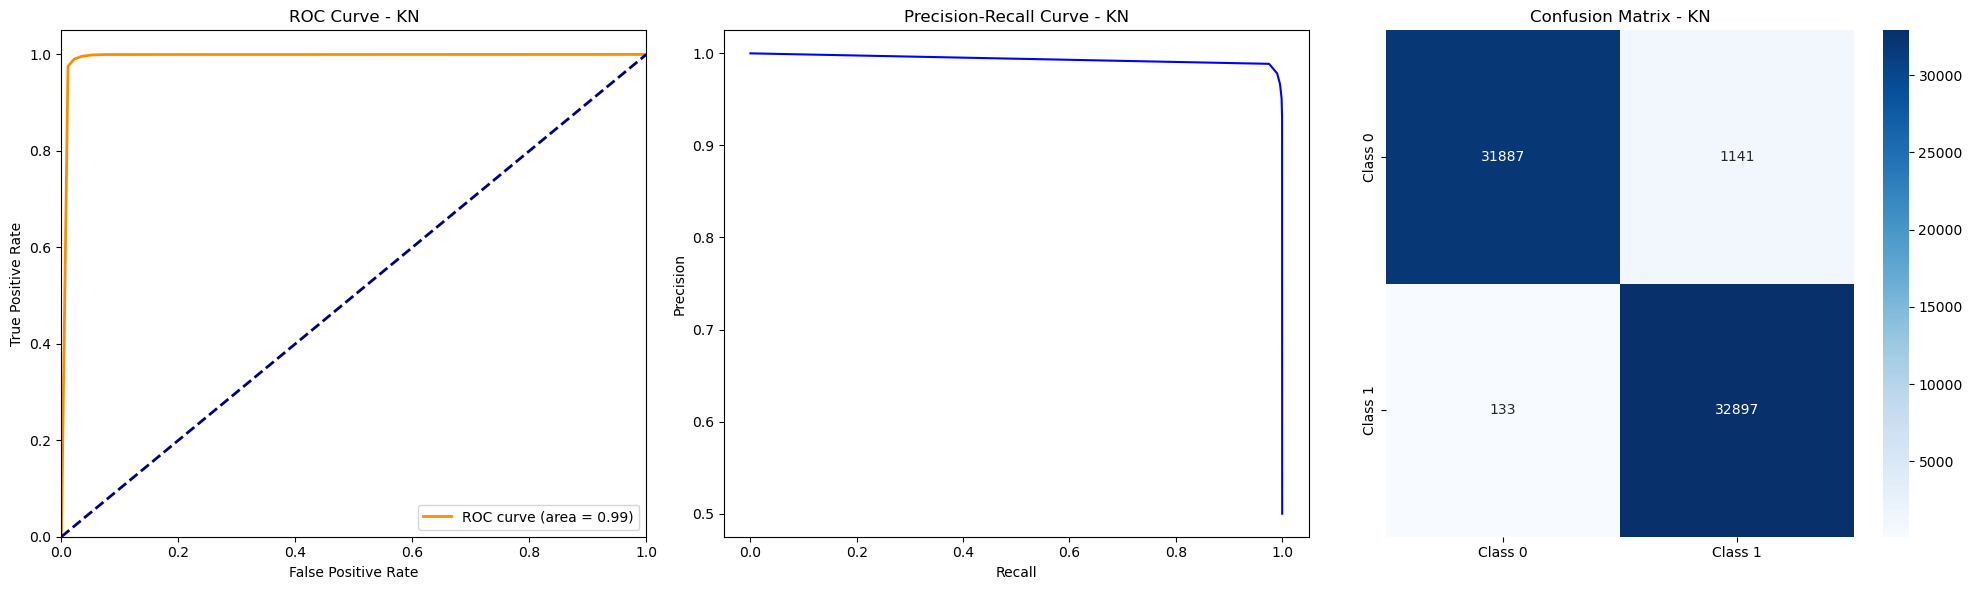

Training and plotting for RF


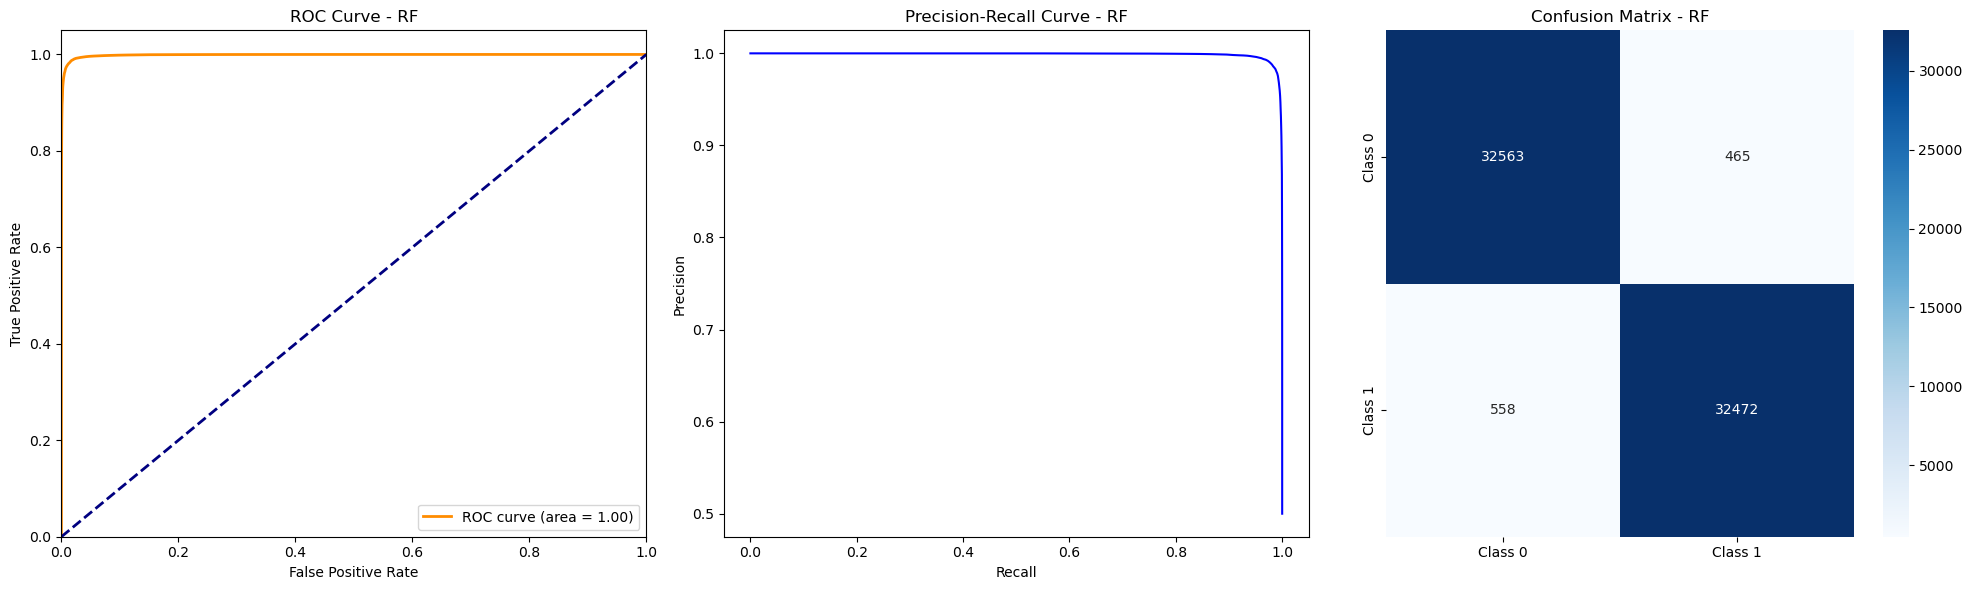

Training and plotting for AdaBoost


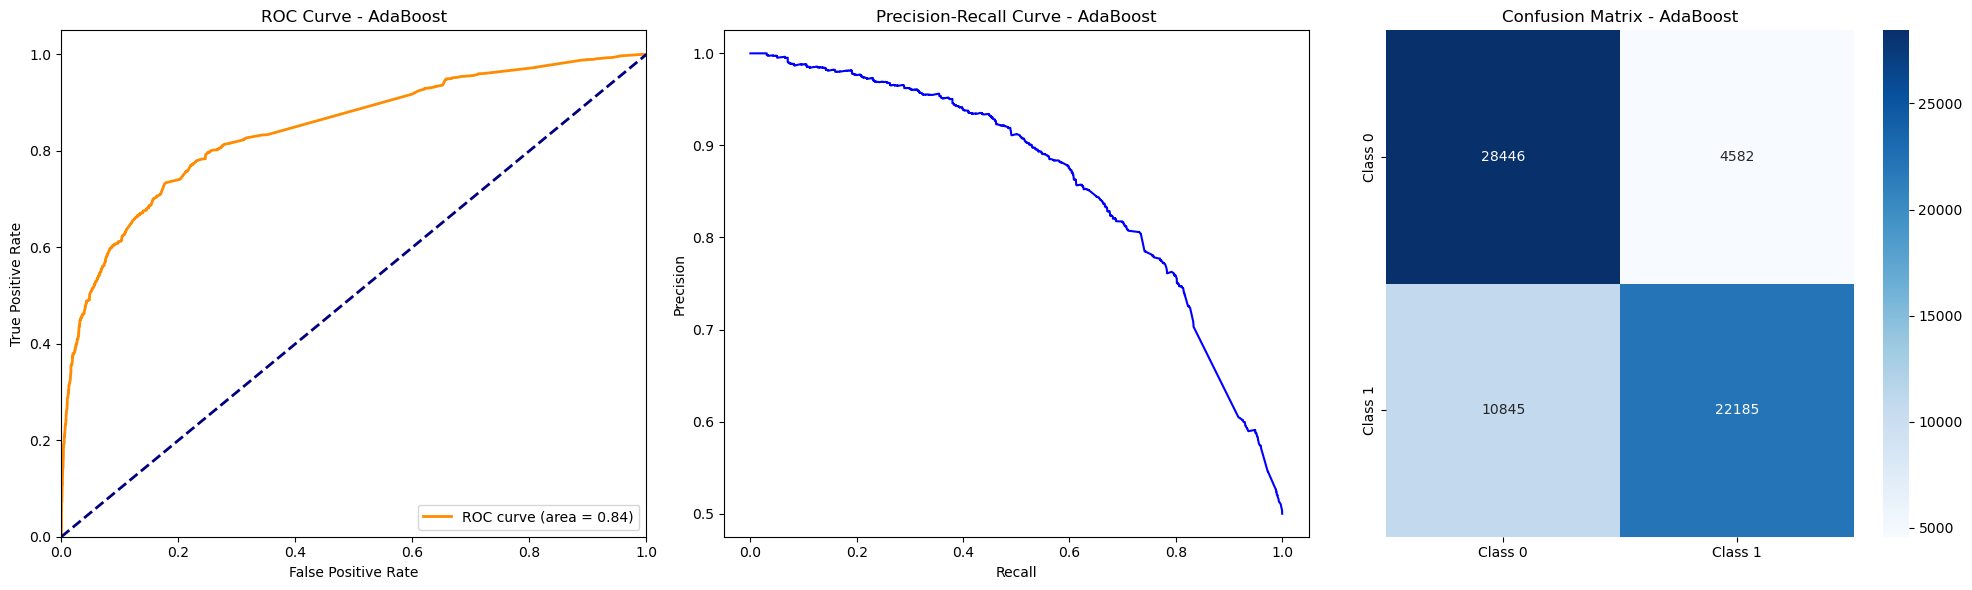

Training and plotting for ETC


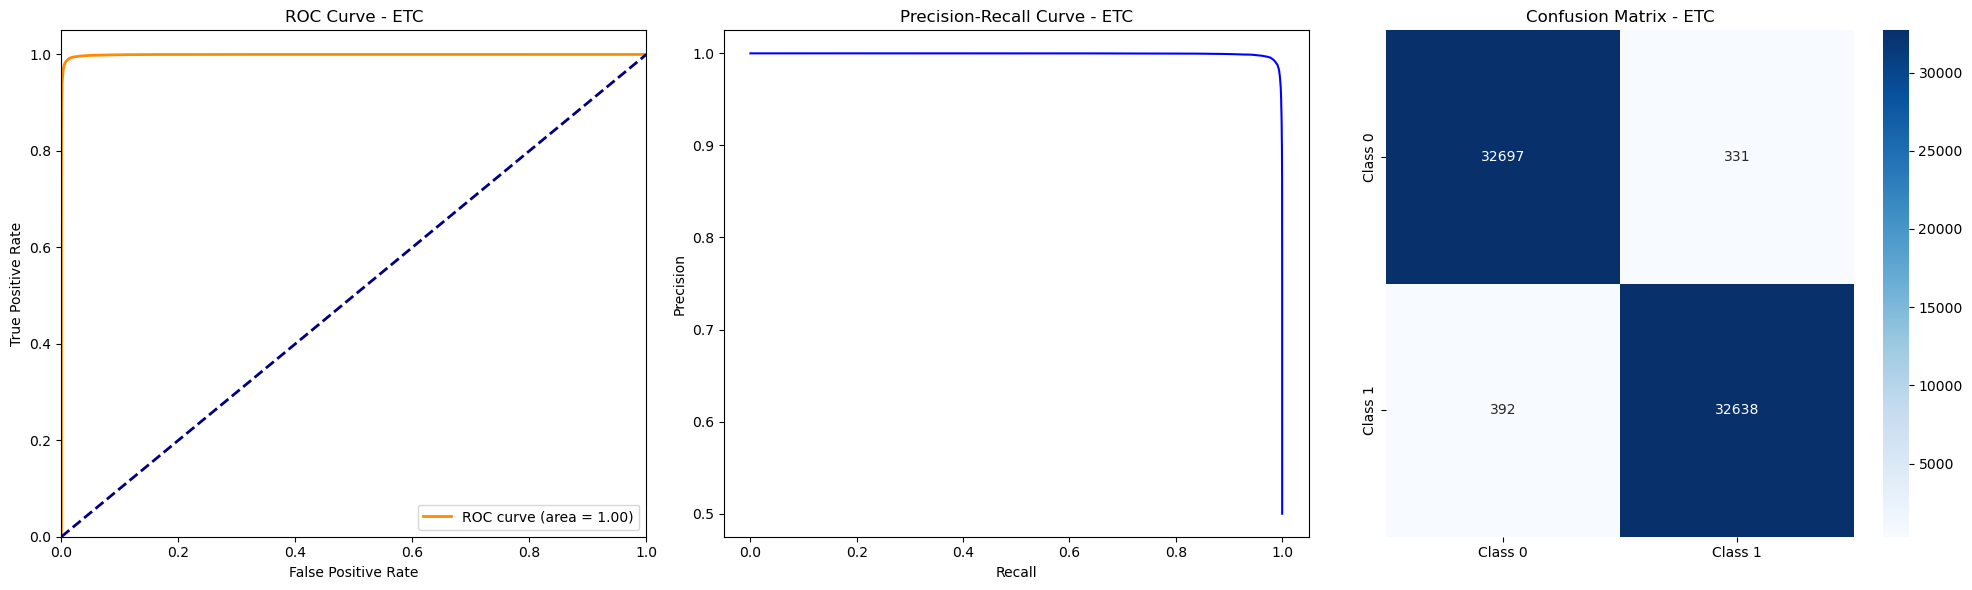

Training and plotting for GBDT


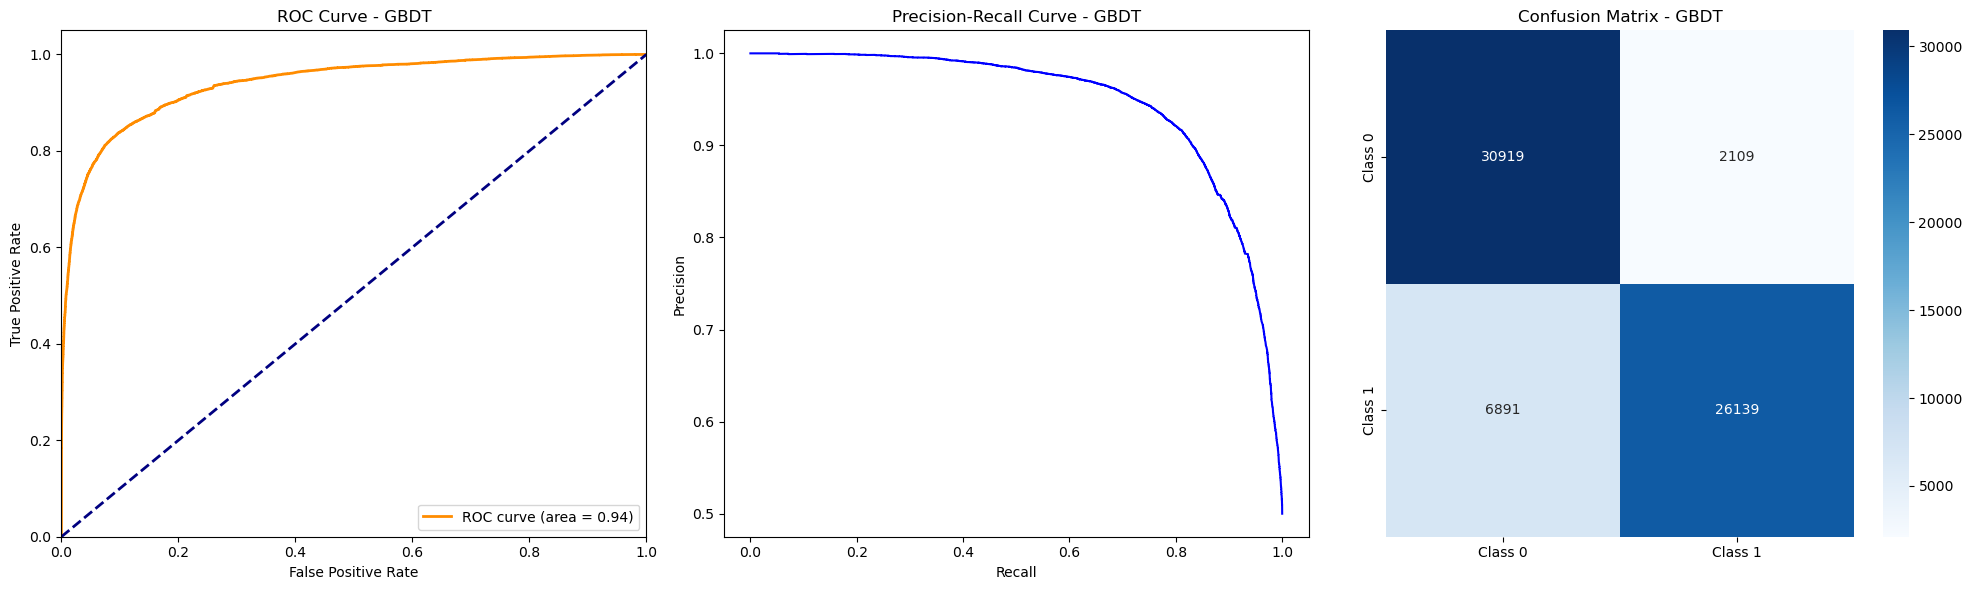

Training and plotting for xgb


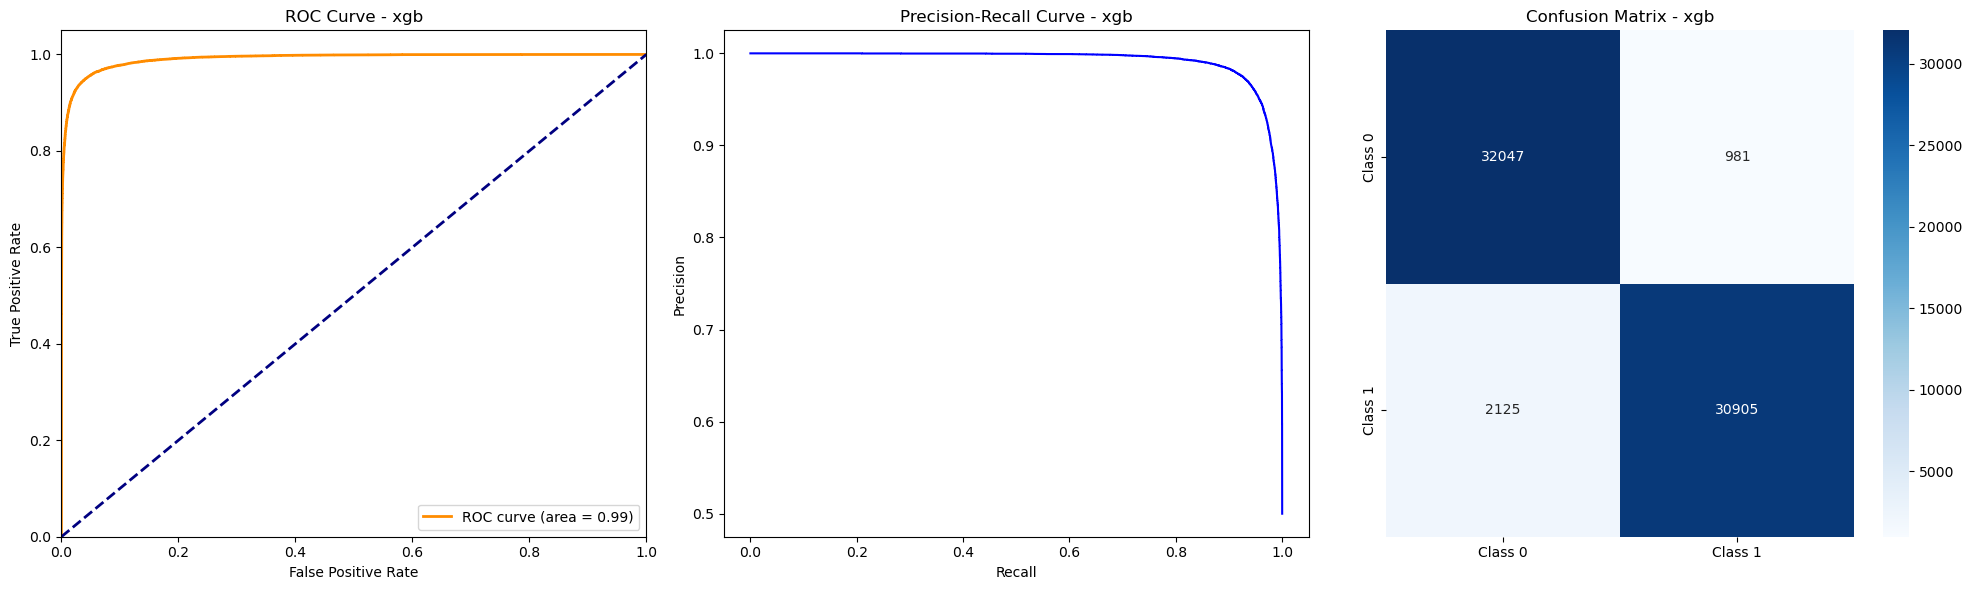

In [26]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

plot_metrics(clfs, train_x, train_y, test_x, test_y)

In [22]:

# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, train_x, train_y, test_x, test_y)

#     print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)
#     recall_scores.append(current_recall)
#     f1_scores.append(current_f1)

In [27]:
smote_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

In [28]:
smote_performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.989055,0.989960,0.988132,0.989045
3,RF,0.984514,0.985882,0.983106,0.984492
7,xgb,0.952981,0.969234,0.935665,0.952154
2,KN,0.980714,0.966479,0.995973,0.981004
0,DT,0.781056,0.929652,0.608144,0.735289
6,GBDT,0.863756,0.925340,0.791371,0.853128
4,AdaBoost,0.766463,0.828819,0.671662,0.742010
1,LR,0.699295,0.767167,0.572298,0.655557
